# Курсовая работа по дисциплине Структуры и алгоритмы обработки данных


## Выполнил студент БВТ2005
## Нурмагомедов Магомед
## Вариант 14

# Задание:

Необходимо найти решение нескольких задач в соответствии с вариантом. 

Каждая задача имеет стоимость в 2 балла. Итоговая оценка выставляется в соответствии с таблицей:

Кол-во баллов | Оценка
:-------- |:-----
0-10 | Неудовлетворительно
12-14 | Удовлетворительно
16-18| Хорошо
20 | Отлично

## Задача 1
В очереди в аэропорту стоят n моржей. Они пронумерованы начиная с конца очереди: морж с номером 1 стоит в конце очереди, а морж с номером n — в начале. Морж с номером i имеет возраст ai.

Морж с номером i становится недовольным, если впереди него стоит более молодой морж, то есть существует такое j (i < j), что ai > aj. Недовольство i-го моржа равно количеству моржей между ним и самым удаленным моржом впереди, который моложе i-го. То есть чем дальше от него стоит этот молодой морж, тем сильнее недовольство.

Менеджер аэропорта попросил вас посчитать для каждого из n моржей в очереди его недовольство.

Входные данные
В первой строке записано целое число n (2 ≤ n ≤ 105) — количество моржей в очереди. Во второй строке записаны целые числа ai (1 ≤ ai ≤ 109).

Обратите внимание, что некоторые моржи могут иметь одинаковый возраст, но для возникновения недовольства необходимо, чтобы тот морж, что ближе к началу, был строго моложе другого.

Выходные данные
Выведите n чисел: если i-ый морж всем доволен, выведите «-1» (без кавычек). Иначе выведите недовольство i-го моржа: количество моржей, которые стоят между ним и самым удаленным моржом впереди него, который более молод.

Примеры\
входные данные\
6\
10 8 5 3 50 45\
выходные данные\
2 1 0 -1 0 -1 

In [7]:
n=-1
while n < 2 or n > 105: # Проверка на входные данные 
    n = int(input("Введите n (2 ≤ n ≤ 105):"))
correct = False
while not correct: # Проверка на входные данные 
    a = list(map(int,input("Введите список a, где элемент списка ai (1 ≤ ai ≤ 109), длина равна n:").split()))
    if len(a) != n:
        continue
    for i in a: 
        if i < 1 or i > 109:
            break
    else:
        correct = True
        
answer = [-1] * len(a)
for i in range(len(a)):
    diff = -1
    for j in range(i,len(a)):
        if a[i] > a[j] and diff < j - i:
            diff = j - i - 1
    answer[i] = diff
    
print("Ответ:", *answer)

Введите n (2 ≤ n ≤ 105):6
Введите список a, где элемент списка ai (1 ≤ ai ≤ 109), длина равна n:10 8 5 3 50 45
Ответ: 2 1 0 -1 0 -1


## Задача 2
Преодолев лестницу, Даша оказалась на занятиях. Чтобы начать заниматься, ей необходимо ввести пароль. Пароль — это строка длины n, удовлетворяющая следующим требованиям:

В строке присутствует как минимум одна цифра,\
В строке присутствует как минимум одна строчная (маленькая) буква латинского алфавита,\
В строке присутствует как минимум один из трёх перечисленных символов — '#', '*', '&'.

Учитывая, что это занятия по программированию, просто так записать пароль не получится.

Для каждого символа пароля закреплена некоторая строка длины m, на каждой из этих n строк стоит указатель на некоторый символ в этой строке. Символ номер i на экране это символ, на который указывает указатель в i-ой строке. Изначально все указатели стоят на символе с индексом 1 (все позиции в этой задаче нумеруются с единицы).

За одну операцию Даша может передвинуть указатель любой одной строки на один символ влево или вправо. Строки цикличны, то есть при сдвиге указателя, который стоит на символе с индексом 1, влево, он перемещается на символ с индексом m, а при сдвиге вправо с позиции m он переместится на позицию 1.

Вам необходимо определить минимальное количество операций, необходимых для того, чтобы строка, отображаемая на экране, стала паролем.

Входные данные
В первой строке находятся два целых числа n, m (3 ≤ n ≤ 50, 1 ≤ m ≤ 50) — длина пароля и длина строк закрепленных за символами пароля.

В каждой из следующих n строк находится строка, закрепленная за i-м символом строки-пароля, длины m, состоящая из цифр, строчных латинских букв и символов '#', '*', '&'.

Входные данные таковы, что всегда можно получить строку-пароль.

Выходные данные
Выведите одно целое число — минимальное количество операций, необходимых для того, чтобы строка, отображаемая на экране, стала паролем.

Примеры\
входные данные\
3 4\
1\*\*2\
a3\*0\
c4\*\*\
выходные данные\
1\
входные данные\
5 5\
#\*\&\#\*\
\*a1c&\
&q2w*\
#a3c#\
*&#\*&\
выходные данные\
3

In [10]:
# Задача решается поиском минимального отступа от края (правого или левого) для каждой строки. Ответом будет являться сумма минимальных отступов
import math
error = False
n = -1
m = -1
while n < 3 or n > 50 or m < 1 or m > 50:
    n, m = input("Введите n m(3 ≤ n ≤ 50, 1 ≤ m ≤ 50) , через пробел: ").split()
    n = int(n)
    m = int(m)
symbols = []
for i in range(n):
    temp = input("Введите строку закрепленную за " + str(i+1) + " символом: ")
    if len(temp) != m: # Проверка
        error = True
        print("Ошибка!!! Строка может быть только длины m (", m, ")")
        break
    symbols.append(list(temp)) # Добавляем в список список символов
    
if not error: # Если нет ошибок, то делаем решение 
    chars = [ '#', '*', '&']    

    shifts_to_make = []
    for symbol in symbols:      
        temp1, temp2, temp3 = math.inf, math.inf, math.inf
        for i in range(m):
            if (symbol[i] in chars or symbol[-i] in chars): # Находим мин отступ от края для спец символов
                temp1 = min(temp1, i)
            if (symbol[i].isdigit() or symbol[-i].isdigit()): # Находим мин отступ от края для цифр
                temp2 = min(temp2, i)
            if (symbol[i].islower() or symbol[-i].islower()): # Находим мин отступ от края для маленьких букв
                temp3 = min(temp3, i)
        shifts_to_make.append((temp1, temp2, temp3)) # Двумерный массив, где строки соответствуют входным строкам, а столбцы спец символам, цифрам и буквам 
    min_shifts = 10000
    for i in range(n): # Перебираем все отступы и в конце находим минимальную сумму отступов 
        for j in range(n): 
            if i==j:continue
            for k in range(n):
                if i==k or j==k:continue 
                min_shifts=min(min_shifts,shifts_to_make[i][0]+shifts_to_make[j][1]+shifts_to_make[k][2]) # Суммируем минимальные отступы для каждого вида символов
    print("Ответ:", min_shifts)    


Введите n m(3 ≤ n ≤ 50, 1 ≤ m ≤ 50) , через пробел: 5 5
Введите строку закрепленную за 1 символом: #*&#*
Введите строку закрепленную за 2 символом: *a1c&
Введите строку закрепленную за 3 символом: &q2w*
Введите строку закрепленную за 4 символом: #a3c#
Введите строку закрепленную за 5 символом: *&#*&
3


## Задача 3
Махмуд пытался решить задачу вершинного покрытия на дереве. Эта задача формулируется так.

По данному неориентированному дереву, состоящему из n вершин, найдите минимальное число вершин, которые покрывают все рёбра. Формально, нам необходимо найти такой набор вершин, что для каждого ребра (u, v), принадлежащего дереву, или u, или v принадлежит этому набору, или они оба принадлежат ему. Махмуд нашёл следующий алгоритм для решения задачи:

Возьмём за корень дерева вершину 1.
Посчитаем количество вершин на чётной глубине и назовём её evenCnt.
Посчитаем количество вершин на нечётной глубине и назовём её oddCnt.
Ответом будет являться минимальное из чисел evenCnt и oddCnt.
Глубиной вершины называется число рёбер в кратчайшем пути между этой вершиной и корнем. Глубина корня равна 0.

Эхаб сказал Махмуду, что данный алгоритм неверен, но Махмуд не поверил ему, поскольку он тестировал этот алгоритм на множестве разных деревьев и он всегда выводил правильный ответ. Поэтому Эхаб просит вас помочь найти два таких дерева, состоящих из n вершин, что алгоритм Махмуда выведет неправильный ответ для первого дерева и правильный — для второго.

Входные данные
В единственной строке ввода содержится одно целое число n (2 ≤ n ≤ 105) — число вершин в деревьях, которые необходимо вывести.

Выходные данные
Вывод должен состоять из 2 независимых частей, каждая из которых содержит дерево. Алгоритм Махмуда должен получать неправильный ответ для дерева в первой части и правильный — для дерева во второй части. Если по какой-либо причине корректного дерева для какой-то части не существует, выведите -1 только для данной части.

Если ответ для какой-то части существует, он должен содержать n - 1 строку, в каждой из которых должно содержаться 2 целых числа u и v (1 ≤ u, v ≤ n), разделённых пробелами, что будет означать, что между вершинами u и v есть неориентированное ребро. Если выданный вашей программой граф не будет являться деревом или не будет следовать формату выходных данных, ваше решение получит вердикт «Неправильный ответ».

Если существует несколько правильных ответов, выведите любой из них.

Примеры\
входные данные\
2\
выходные данные\
-1\
1 2

In [11]:
def correct(n): # Всегда правильный ответ алгоримта Махмуда. Глубина дерева не больше 1 
    for i in range(2,n):
        print(1,i);
def incorrect(n):
    if n < 6:
        print('-1')
        return
    
    print(1, 2)
    print(2, 3)
    print(2, 4)
    for i in range(5,n):
        print(4, i)
n = -1
while n < 2 or n > 105:
    n = int(input("Введите n число вершин в деревьях, которые необходимо вывести (2 ≤ n ≤ 105): "))
print("Дерево при котором алгоритм Махмуда не верный:")
incorrect(n)
print("Дерево при котором алгоритм Махмуда верный:")
correct(n)


Введите n число вершин в деревьях, которые необходимо вывести (2 ≤ n ≤ 105): 6
Дерево при котором алгоритм Махмуда не верный:
1 2
2 3
2 4
4 5
Дерево при котором алгоритм Махмуда верный:
1 2
1 3
1 4
1 5


# ======== ОБЬЯСНЕНИЕ ПО АЛГОРИТМУ  ========
### Всегда правильное решение - когда глубина не больше 1 
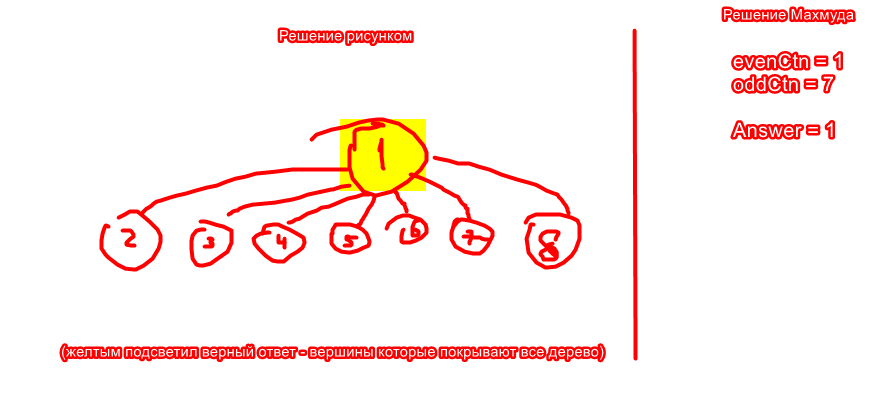
### Создаем ситуацию в которой заведомо известен правильный ответ = 2. Если вершин больше чем 5, тогда алгоритм Махмуда не дает верный ответ 
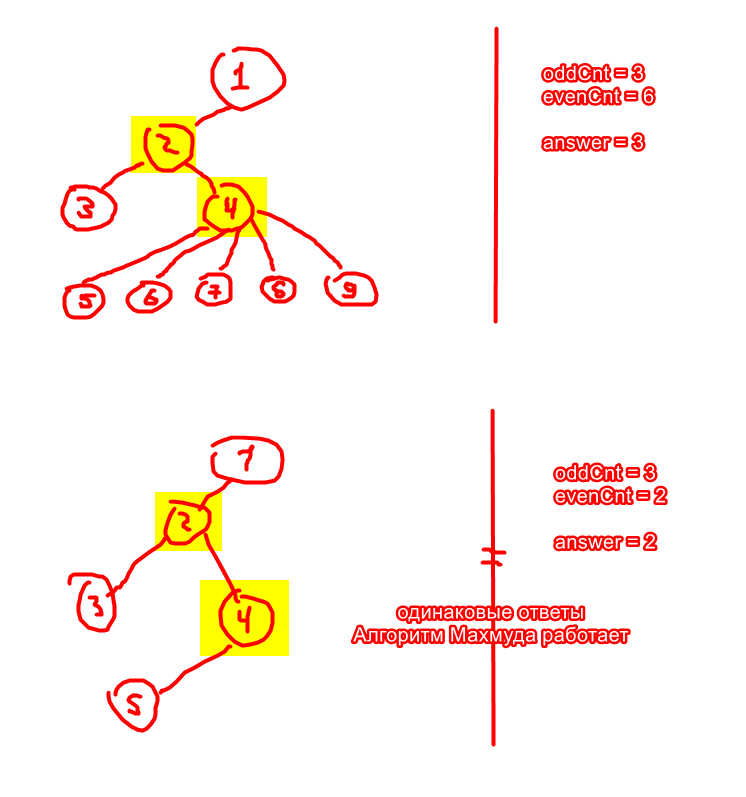
### Тут я короче искал сколько минимально может быть вершин, чтобы найти неверный ответ алгоритма Махмуда. Сначала я красным рисовал дерево на 5 вершин, найти дерево на 5 вершин при котором ответ неверный  не удалось. Потом была добавлена синяя 6 вершина и неверный ответ сразу найден 
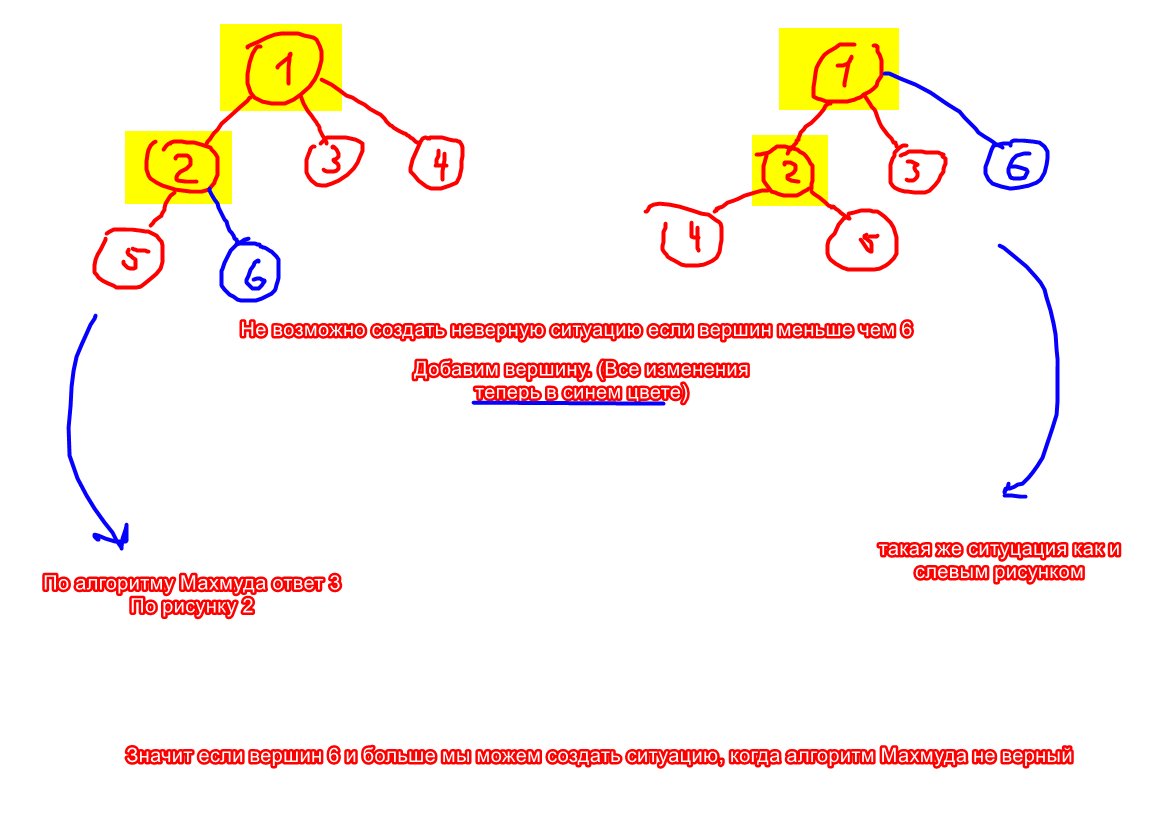
# ============================================

## Задача 4
У тренера по программированию есть n обучающихся у него студентов, причем известно, что n делится на 3. Пускай все студенты пронумерованы от 1 до n, включительно.

Тренер хочет перед чемпионатом университета по программированию разделить всех студентов на команды из трех человек. Для некоторых пар студентов известно, что они хотят быть в одной команде. Причем, если i-ый студент хочет быть в команде с j-ым, то и j-ый хочет быть в команде с i-ым. Тренер заинтересован в том, чтобы команды показали хороший результат, поэтому он хочет, чтобы было выполнено условие: если i-ый студент хочет быть в одной команде с j-ым, то i-ый и j-ый студенты должны быть в одной команде. Также, очевидно, каждый студент должен быть ровно в одной команде.

Помогите тренеру, разделите команды так, как он хочет.

Входные данные
В первой строке входных данных записаны целые числа n и m (3 ≤ n ≤ 48, . Далее следует m строк, в каждой из них записана пара целых чисел ai, bi (1 ≤ ai < bi ≤ n) — пара ai, bi означает, что студенты с номерами ai и bi хотят быть в одной команде.

Гарантируется, что n делится на 3. Гарантируется, что каждая пара ai, bi упоминается во входных данных не более одного раза.

Выходные данные
Если искомого разбиения на команды не существует, выведите число -1. Иначе выведите  строки. В каждой строке выведите три целых числа xi, yi, zi (1 ≤ xi, yi, zi ≤ n) — i-ая команда.

Если существует несколько ответов, разрешается вывести любой.

Примеры\
входные данные\
3 0\
выходные данные\
3 2 1 \
входные данные\
6 4\
1 2\
2 3\
3 4\
5 6\
выходные данные\
-1

In [15]:
import itertools


def checkComb(cmb): # Проверка на пересекаемость комбинаций 
    res = True
    # print(cmb)
    for i in cmb:
        for j in cmb:
            # print(i,j)
            if i != j and len(set(i) & set(j)):
                res = False
    return res


def checkFrendship(cmb, fList): # Проверка на дружбу в комбинации
    res = True
    combs = []
    for i in fList:
        for j in cmb:
            if i not in combs:
                if len(set(i) & set(j)) == 2:
                    combs.append(i)
                else:
                    res = False
#         print(combs)
    return res

n, m = -1, -1
while n < 3 or n > 58 or n % 3 != 0 or m < -1: # Проверка на входные данные
    n, m = input("Введите целые числа n, m (3 ≤ n ≤ 48). Число студентов и дружественные пары: ").split()
    n, m = int(n), int(m)
friendsList = []
for i in range(0, m):
    s = input("Введите " + str(i+1) + "-ю дружественную пару: ").split()
    friendsList.append([int(s[0]), int(s[1])])

res = []

units = [x for x in range(1, n + 1)]

allGroups = itertools.combinations(units, 3)
allPermCombinations = itertools.combinations(list(allGroups), n // 3)
for i in allPermCombinations:
    if checkComb(i) and checkFrendship(i, friendsList):
        res = i
        break

print("Ответ: ")
if not len(res):
    print(-1)
else:
    for i in res:
        ans = ""
        for j in i:
            ans += str(j) + " "
        print(ans)


Введите целые числа n, m (3 ≤ n ≤ 48). Число студентов и дружественные пары: 6 4
Введите 1-ю дружественную пару: 1 2
Введите 2-ю дружественную пару: 2 3
Введите 3-ю дружественную пару: 3 4
Введите 4-ю дружественную пару: 5 6
Ответ: 
-1


## Задача 5
Текстовый редактор Beroffice имеет широкие возможности по работе с текстами. Одна из возможностей — автоматический поиск опечаток и формирование предложения по их исправлению.

При наборе текста в Beroffice используются только строчные буквы английского алфавита (то есть 26 букв от a до z). При наборе слова Beroffice предполагает, что слово набрано с опечаткой, если встречаются три или более согласные буквы подряд. Единственное исключение — если блок подряд идущих согласных букв состоит из одинаковых букв, то этот блок (даже если его длина больше или равна трём) не считается опечаткой. Формально, слово набрано с опечаткой, если в слове существует блок не менее чем из трёх согласных подряд и эти согласные — не одна и та же буква.

Например:

следующие слова набраны с опечатками: «hellno», «hackcerrs» и «backtothefutttture»;
следующие слова набраны без опечаток: «helllllooooo», «tobeornottobe» и «oooooo».
Редактор Beroffice при обнаружении слова с опечаткой вставляет минимальное количество пробелов в слово (разделяя его на несколько слов) так, что каждое из получившихся слов набрано без опечаток.

Реализуйте эту функциональность редактора Beroffice. Считайте гласными только буквы 'a', 'e', 'i', 'o' и 'u'. Все остальные буквы следует считать согласными.

Входные данные
В единственной строке входных данных содержится непустое слово, состоящее из строчных букв английского алфавита. Длина слова — от 1 до 3000 букв.

Выходные данные
Выведите заданное слово без изменений, если оно не содержит опечаток. Если слово содержит хотя бы одну опечатку, то вставьте в него наименьшее количество пробелов так, что каждое из получившихся слов не содержит опечаток. Если решений несколько, то выведите любое из них.

Примеры\
входные данные\
hellno\
выходные данные\
hell no 

In [17]:
s = ""
while len(s) < 1 or len(s) > 3000:
    s = input("Введите строку, Длина строки — от 1 до 3000 букв: ").lower()

answer = ''
count = 0
curr = ''
diff = 0
for i in s:
    if (i in ['a', 'e', 'i', 'o', 'u']):
        answer += i
        count = 0
        curr = ''
        diff = 0
    else:
        if (count >= 2 and (i != curr or diff == 1)):
            answer += ' '
            answer += i
            count = 1
            curr = i
            diff = 0
        else:
            if (i == curr and diff == 0):
                answer += i
                curr = i
                count += 1
            elif (curr == ''):
                answer += i
                curr = i
                count += 1
            else:
                diff = 1
                curr = i
                count += 1
                answer += i
print("Ответ:", answer)

Введите строку, Длина строки — от 1 до 3000 букв: backtothefutttture
Ответ: back tothefutttture


## Задача 6
В ряд расположены n жемчужинок. Пронумеруем жемчужинки целыми числами от 1 до n слева направо. Жемчужинка номер i имеет тип ai.

Последовательность подряд идущих жемчужинок будем называть подотрезком. Подотрезок будем называть хорошим, если в нём есть пара жемчужинок одинакового типа.

Вам требуется разбить исходный ряд жемчужинок на наибольшее количество хороших подотрезков. Обратите внимание, что каждая жемчужинка должна попасть ровно в один подотрезок разбиения.

Рекомендуется для ввода и вывода данных использовать функции scanf, printf в языке C++, поскольку они работают значительно быстрее потоков cin, cout. Аналогично, рекомендуется использовать классы BufferedReader, PrintWriter вместо Scanner, System.out в языке Java.

Входные данные
В первой строке находится целое число n (1 ≤ n ≤ 3·105) — количество жемчужинок в ряду.

Во второй строке находятся n целых чисел ai (1 ≤ ai ≤ 109) — тип i-й жемчужинки.

Выходные данные
В первой строке выведите целое число k — наибольшее количество подотрезков в разбиении ряда жемчужинок.

В каждой из следующих k строк выведите по два целых числа lj, rj (1 ≤ lj ≤ rj ≤ n) — номера самой левой и самой правой жемчужинки в j-м подотрезке.

Выведенный набор должен образовывать разбиение ряда жемчужинок на хорошие подотрезки, то есть каждая жемчужинка исходного ряда должна попасть ровно в один подотрезок и каждый подотрезок должен содержать пару жемчужинок одинакового типа.

Если существует несколько оптимальных решений вы можете вывести любое из них. Подотрезки можно выводить в любом порядке.

Если исходный ряд невозможно разбить на хорошие подотрезки, выведите одно число "-1".

Примеры\
входные данные\
5\
1 2 3 4 1\
выходные данные\
1\
1 5

In [19]:
n = -1
while n < 1 or n > 3*10e5: # Проверка на входные данные 
    n = int(input("Введите целое число n (1 ≤ n ≤ 3·10e5) - количество жемчужинок в ряду: "))
    
correct = False
while not correct: # Проверка на входные данные 
    a = list(map(int,input("Введите список a, где элемент списка ai - тип i-й жемчужинки (1 ≤ ai ≤ 109), длина списка равна n: ").split()))
    if len(a) != n:
        continue
    for i in a: 
        if i < 1 or i > 109:
            break
    else:
        correct = True

# Когда мы считали все без ошибок, делаем решение
S = set()
R = [0]  # В R будут хранится точки началоконца подотрезков. 0 - начало первого подотрезка
for i in range(len(a)):
    if a[i] in S:  # Если нашли элемент в наборе, записываем точку разрыва подотрезка
        R.append(i + 1)
        S = set()
    else:
        S.add(a[i])  # Добавляем элемент в набор
print("Ответ: ")
if len(R) == 1:
    print(-1)
else:
    R[-1] = n # Конец последнего подотрезка - n
    print(len(R) - 2) # Кол-во найденных подотрезков это количество точек минус 0 и n точки

    for i in range(1,len(R)):
        print(int(R[i - 1]) + 1, R[i])

Введите целое число n (1 ≤ n ≤ 3·10e5) - количество жемчужинок в ряду: 7
Введите список a, где элемент списка ai - тип i-й жемчужинки (1 ≤ ai ≤ 109), длина списка равна n: 1 2 1 3 1 2 1
Ответ: 
1
1 3
4 7


## Задача 7
Студентка Мария успешно завершила обучение в престижном вузе и теперь гуляет на выпускном. Студенты много мечтают о красивой жизни, поэтому одногруппники Маши решили соорудить небольшую пирамидку из одинаковых бокалов для шампанского. Получилась пирамида высоты n, такая что на самом верху стоял 1 бокал, на уровне ниже — 2 бокала, ещё ниже — 3 бокала и так далее. В последнем, самом нижнем уровне было ровно n бокалов.

Машин одногруппник Влад вызвался наполнять пирамиду шампанским. Он тысячу раз видел в кино, как эффектно распространяется по бокалам шампанское, перетекая с более высоких этажей на более низкие. Он взял бутылку и начал лить её содержимое в бокал, расположенный на верхнем уровне.

За одну секунду Влад выливает в верхний бокал количество шампанского, равное по объёму в точности одному бокалу. Если бокал полностью наполнен, а в него льётся шампанское, то все излишки поровну распределяются между двумя бокалами, на которых расположен данный. Если переполненный бокал стоит на нижнем уровне, то шампанское просто выливается на стол. В рамках данной задачи будем считать, что шампанское растекается по пирамиде мгновенно. Влада интересует, сколько бокалов будут наполнены до краёв через t секунд, когда бутылка подойдёт к концу.

Входные данные
В единственной строке входных данных записаны два целых числа n и t (1 ≤ n ≤ 10, 0 ≤ t ≤ 10 000) — высота пирамиды и количество единиц времени, через которое бутылка закончится.

Выходные данные
Выведите единственное число — количество наполненных доверху бокалов в пирамиде через t секунд.

Примеры\
входные данные\
3 5\
выходные данные\
4

In [21]:
n, t = -1, -1
while n < 1 or n > 10 or t < 0 or t > 10000:
    n, t = map(int, input("Введите два целых числа n и t (1 ≤ n ≤ 10, 0 ≤ t ≤ 10 000) — высота пирамиды и количество единиц времени, через которое бутылка закончится: ").split(' '))
pyramid = []
for i in range(1, n+1): # Создание двумерного массива - пирамиды. Там где 1 строка это вершина 
    temp_arr = []
    for j in range(i):
        temp_arr.append(0)
    pyramid.append(temp_arr)
# print(pyramid)
for curr in range(t):     # i - текущая секунда t - общее кол-во
    pyramid[0][0] += 1 # У нас сразу же заполняется самый верхний стакан пирамиды
    for i in range(n-1):
        for j in range(i+1):
            if pyramid[i][j] > 1: # Если заполнилась локальная вершина, то мы заполняем левый нижний и правый нижний половиной потока (так как одновременно льется в два стакана)
                diff = pyramid[i][j] - 1
                pyramid[i][j] = 1
                pyramid[i+1][j+1] += diff / 2
                pyramid[i+1][j] += diff / 2
cnt = 0
# print(pyramid)
for i in range(n):
    for j in range(i+1):
        if pyramid[i][j] >= 1:
            cnt += 1
print("Ответ:", cnt)

Введите два целых числа n и t (1 ≤ n ≤ 10, 0 ≤ t ≤ 10 000) — высота пирамиды и количество единиц времени, через которое бутылка закончится: 3 5
Ответ: 4


## Задача 8
И где здесь телефонные номера?

Дана строка s из строчных букв английского алфавита и число k. Найдите лексикографически минимальную строку t, имеющую длину k, множество букв которой является подмножеством множества букв s и s лексикографически меньше t.

Гарантируется, что ответ существует.

Обратите внимание, что под множеством букв строки подразумевается множество, а не мультимножество. В частности, множество букв строки abadaba это {a, b, d}.

Строка p считается лексикографически меньше строки q, если p — префикс q, не равный q или существует i такое, что pi < qi и для всех j < i выполнено pj = qj. Например, abc лексикографически меньше abcd , abd лексикографически меньше abec, afa лексикографически не меньше ab и a лексикографически не меньше a.

Входные данные
В первой строке через пробел заданы два целых числа n и k (1 ≤ n, k ≤ 100 000) — длина строки s и необходимая длина строки t.

Во второй строке задана строка s, состоящая из n строчных букв английского алфавита.

Выходные данные
Выведите строку t, удовлетворяющую условиям, описанным выше.

Гарантируется, что ответ существует.

Примеры\
входные данные\
3 3\
abc\
выходные данные\
aca

In [23]:
n, k = -1, -1
while n < 1 or k < 1 or n > 100000 or k > 100000:
    n, k = map(int, input("Введите через пробел два целых числа n и k (1 ≤ n, k ≤ 100 000) — длина изначальной строки и необходимая длина итоговой строки: ").split())
while len(s) != n:
    s = input("Введите изначальную строку длины " + str(n) + ": ")
s_sorted = sorted(set(s))
# print(s_sorted)
big = s_sorted[-1]
small = s_sorted[0]
if k > n:
    t = s + ''.join([small] * (k - n))
else:
    if len(s) == 1:
        t = s
    else:
        second_big = s_sorted[-2]
        ind = s.rfind(second_big)
        print(s[:ind])
        t = s[:ind] + big + ''.join([small]*(k - ind - 1)) # Строка получается префикс до второго по величине символа + большой символ + все наименьшие 


print("Ответ:", t)

Введите через пробел два целых числа n и k (1 ≤ n, k ≤ 100 000) — длина изначальной строки и необходимая длина итоговой строки: 5 10
Введите изначальную строку длины 5azyeaaa
Введите изначальную строку длины 5azyea
Ответ: azyeaaaaaa


## Задача 9
Вадим очень любит путешествовать. Недавно он услышал о том, что в его городке появился клуб каякеров, и его очень заинтересовал этот вид путешествия. Поэтому Вадим присоединился к группе каякеров и готов отправиться в сплав.

Сейчас группе нужно распределиться по каякам. В группе 2·n человек (включая Вадима), и у них есть ровно n - 1 двухместных и 2 одноместных каяка. Вес i-го человека равен wi, и вес очень важен в сплаве — если разница весов двух человек, сидящих в двухместном каяке, слишком велика, то каяк становится неустойчивым и может перевернуться. И, конечно же, каякеры хотят распределиться по плавсредствам так, чтобы этого не произошло.

Формально, неустойчивость одноместного каяка всегда равна 0, а неустойчивость двухместного каяка равна модулю разности между весами людей, которые заняли этот каяк. Неустойчивость всей группы — это сумма неустойчивостей всех каяков.

Помогите группе определить минимально возможную суммарную неустойчивость!

Входные данные
В первой строке задано одно целое число n (2 ≤ n ≤ 50).

Во второй строке заданы 2·n целых чисел w1, w2, ..., w2n, где wi — вес человека i (1 ≤ wi ≤ 1000).

Выходные данные
Выведите минимально возможную неустойчивость группы.

Примеры\
входные данные\
2\
1 2 3 4\
выходные данные\
1

In [25]:
import itertools
n = -1
while n < 2 or n > 50: # Проверка на входные данные 
    n = int(input("Введите целое число n (2 ≤ n ≤ 50): "))
correct = False
while not correct: # Проверка на входные данные 
    a = list(map(int,input("Введите " + str(2*n) + " числа, веса каждого человека: ").split()))
    if len(a) != 2*n:
        continue
    for i in a: 
        if i < 1 or i > 1000:
            break
    else:
        correct = True
        
weights = a
unstability = []
 
for perm in itertools.permutations(weights): # перебираем комбинации списка weights
    diffs = []
    for i in range(2, len(weights), 2): # Первые два оставляем (как будто в одноместные лодки)
        diffs.append(abs(perm[i]-perm[i+1]))
    unstability.append(sum(diffs))

print("Ответ:", min(unstability))


Введите целое число n (2 ≤ n ≤ 50): 2
Введите 4 числа, веса каждого человека: 1 2 3 4
Ответ: 1


## Задача 10
Санта-Клаус решил разобрать свою клавиатуру, чтобы её почистить. После того, как он поставил все клавиши обратно, он с ужасом понял, что что-то не так: некоторые пары клавиш перепутаны между собой! Таким образом, Санта-Клаус подозревает, что каждая клавиша либо стоит на своём месте, либо заняла место другой, а та другая — на месте первой.

Для того, чтобы убедиться в этом, найти ошибку и восстановить верное расположение, Санта-Клаус набрал текст своей любимой скороговорки, смотря только на надписи на клавиатуре.

Вам даны любимая скороговорка Санта-Клауса и строка, которая получилась в результате набора. Определите, какие пары клавиш Санта-Клаус мог перепутать. Каждая клавиша должна принадлежать не более чем одной паре перепутанных клавиш.

Входные данные
Входные данные состоят из двух строк s и t — любимой скороговорки Санта-Клауса и строки, которая получилась после набора скороговорки. Строки s и t непусты и имеют одинаковую длину, которая не превышает 1000, включительно. Обе строки состоят только из строчных латинских букв.

Выходные данные
Если предположение Санта-Клауса неверно и клавиатура требует починки и её нельзя починить, поменяв местами буквы в нескольких непересекающихся парах, выведите одно число «-1» (без кавычек).

Иначе в первой строке выведите число k (k ≥ 0) — количество пар букв, которые нужно поменять местами. Затем в следующих k строках выведите по две буквы, разделённые пробелом — буквы, которые необходимо поменять местами на клавиатуре. Все выведенные буквы должны быть различны.

Если ответов несколько, выведите любой. Как пары, так и буквы в парах можно выводить в любом порядке.

Каждая буква должна присутствовать не более чем в одной паре. Санта-Клаус считает, что клавиши расположены корректно, если он может набрать на клавиатуре текст своей любимой скороговорки без ошибок.

Примеры\
входные данные\
helloworld\
ehoolwlroz\
выходные данные\
3\
h e\
l o\
d z

In [27]:
def SantaFind(a,b):
    symbols = {} # Словарь в котором будет соответсвие символов например {'a':'b', 'b':'a'} значит, что кнопки a и b перепутаны местами
    pairs = []
    for i in range(len(a)):
        if a[i] in symbols: # Символ из изначальной строки найден в символах
            if symbols[a[i]] != b[i]: # Если он не соотвествует соответсвенному символу во второй строке 
                return False
        elif b[i] in symbols: # Аналогично с полученной строкой 
            if symbols[b[i]] != a[i]:
                return False
        else:
            symbols[a[i]] = b[i] 
            symbols[b[i]] = a[i]
            if a[i] != b[i]: 
                pairs.append((a[i], b[i]))
    return pairs
a = ""
b = ""
while len(a) != len(b) or len(a) > 1000 or len(a) < 1:
    a = input("Введите любимую скороговорку Санта Клауса: ")
    b = input("Введите что у него получилось из-за сломанной клавиуатуры: ")
    

pairs = SantaFind(a,b)

print("Ответ:")
if pairs is not False:
    print(len(pairs))
    for elem in pairs:
        print(elem[0], elem[1])
else:
    print(-1)

Введите любимую скороговорку Санта Клауса: helloworld
Введите что у него получилось из-за сломанной клавиуатуры: ehoolwlroz
Ответ:
3
h e
l o
d z
